In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [289]:
# Cargar los datos
data = pd.read_csv('data_limpieza.csv')
data.shape

(8465, 13)

In [290]:
data.head()
headers = data.columns.tolist()
headers

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday']

- **Date**: fecha de la observación
- **Hour**: hora de la observación (0-23)
- **Temperature(C)**: temperatura en grados Celsius
- **Humidity(%)**: humedad relativa
- **Wind speed (m/s)**: velocidad del viento en metros por segundo
- **Visibility (10m)**: visibilidad con una escala de 10 metros
- **Dew point temperature(C)**: temperatura de punto de rocío en grados Celsius
- **Solar Radiation (MJ/m2)**: radiación solar en MegaJoules por metro cuadrado
- **Rainfall(mm)**: nivel de lluvia en milímetros
- **Snowfall (cm)**: nieve en centímetros
- **Seasons**: estación del año
- **Holiday**: si es un día festivo

**Variable de respuesta:** 
- **Rented Bike Count**: ventas del producto publicitado en miles de unidades

In [291]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extraer día, mes y año de la columna 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Eliminar la columna 'Date'
data.drop(columns=['Date'], inplace=True)

# Mostrar las primeras filas del DataFrame
data.head()

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   
3              2000                     -17.6                      0.0   
4              2000                     -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday   Day  Month    Year  
0           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
1           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
2           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
3           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
4           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0

In [292]:
# Realizo una copia del DataFrame original
data_encoded = data.copy()

# Codificar las columnas categóricas en la copia
data_encoded['Seasons'] = data_encoded['Seasons'].astype('category').cat.codes
data_encoded['Holiday'] = data_encoded['Holiday'].astype('category').cat.codes


In [293]:
data_encoded.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8465.000000  8465.000000     8465.000000  8465.000000   
mean          729.156999    11.507029       12.771057    58.147194   
std           642.351166     6.920899       12.104375    20.484839   
min             2.000000     0.000000      -17.800000     0.000000   
25%           214.000000     6.000000        3.000000    42.000000   
50%           542.000000    12.000000       13.500000    57.000000   
75%          1084.000000    18.000000       22.700000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8465.000000       8465.000000               8465.000000   
mean           1.725883       1433.873479                  3.944997   
std            1.034281        609.051229                 13.242399   
min            0.000000         27.000000                -30.600000   
25%            0.900000        935.000000                 -5.100000   
50%            1.500000       1690.000000                  4.700000   
75%            2.300000       2000.000000                 15.200000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)      Seasons  \
count              8465.000000    8465.00000    8465.000000  8465.000000   
mean                  0.567868       0.14912       0.077685     1.542351   
std                   0.868245       1.12554       0.444063     1.102876   
min                   0.000000       0.00000       0.000000     0.000000   
25%                   0.000000       0.00000       0.000000     1.000000   
50%                   0.010000       0.00000       0.000000     2.000000   
75%                   0.930000       0.00000       0.000000     3.000000   
max                   3.520000      35.00000       8.800000     3.000000   

           Holiday          Day        Month         Year  
count  8465.000000  3257.000000  3257.000000  3257.000000  
mean      0.951802     6.345103     6.486337  2017.911575  
std       0.214198     3.437584     3.468250     0.283955  
min       0.000000     1.000000     1.000000  2017.000000  
25%       1.000000     3.000000     3.000000  2018.000000  
50%       1.000000     6.000000     7.000000  2018.000000  
75%       1.000000     9.000000    10.000000  2018.000000  
max       1.000000    12.000000    12.000000  2018.000000

### Incluir seaborn para Visualización

In [294]:
import seaborn as sns

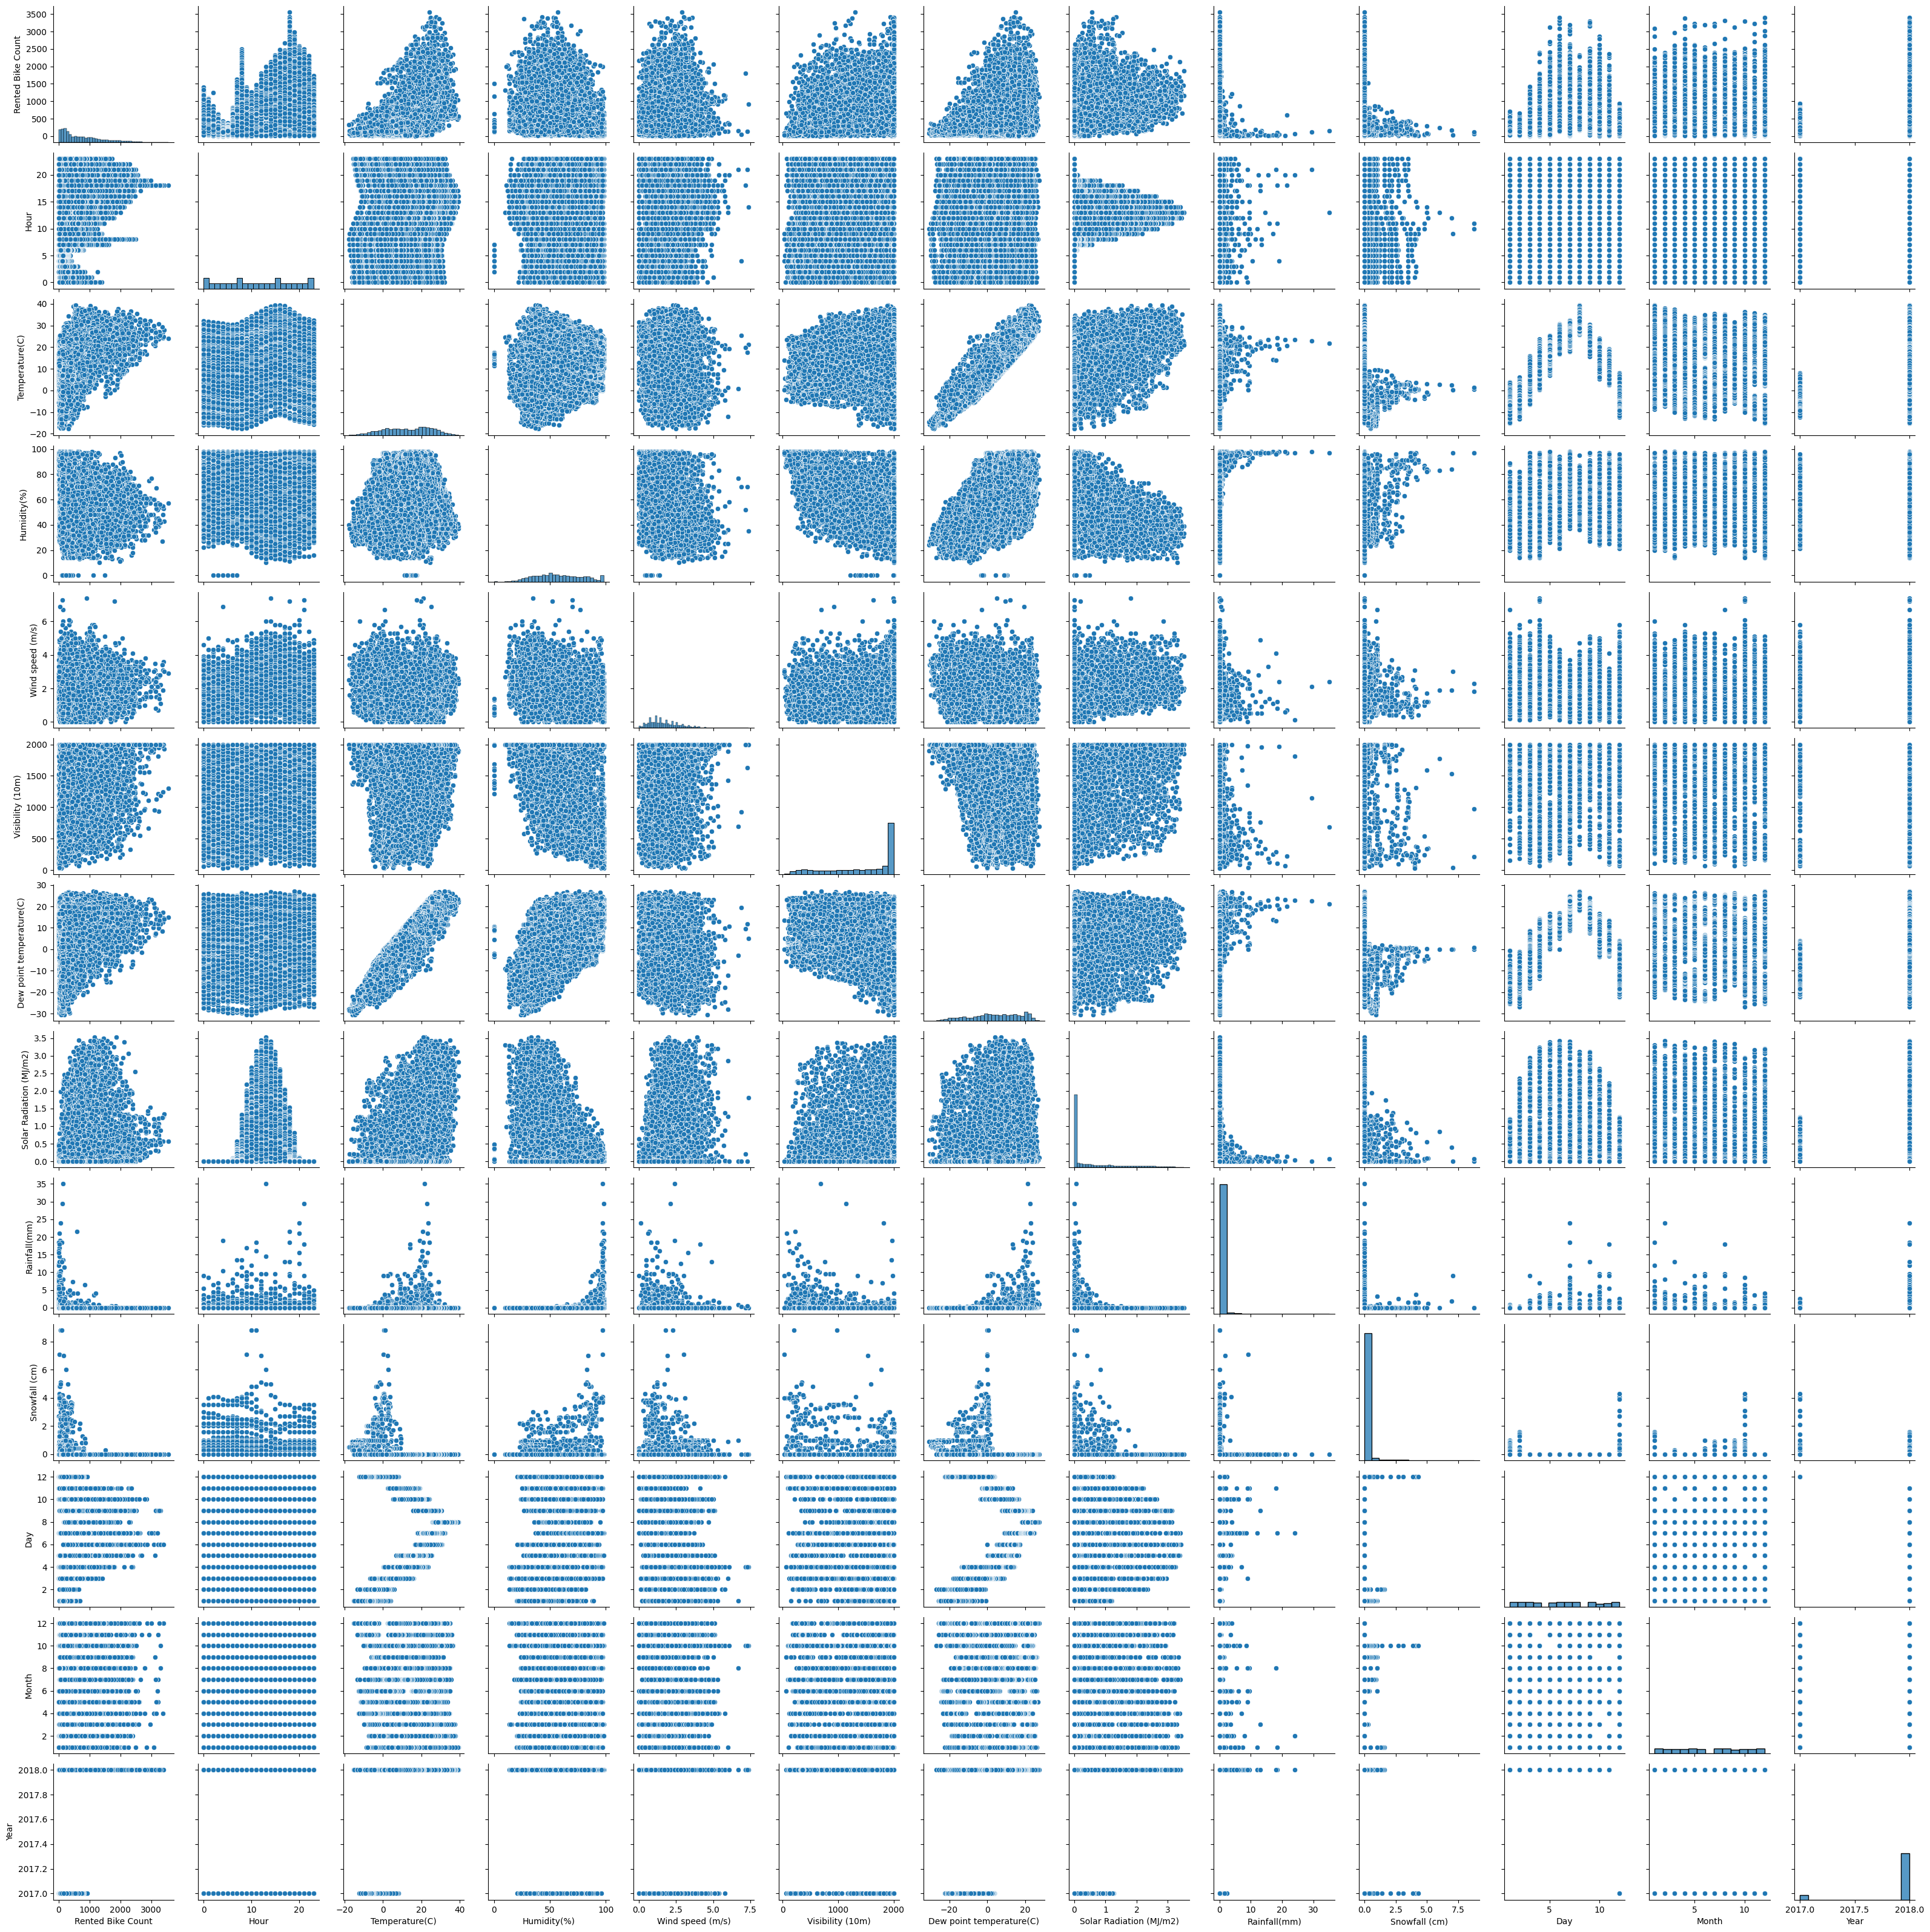

In [295]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

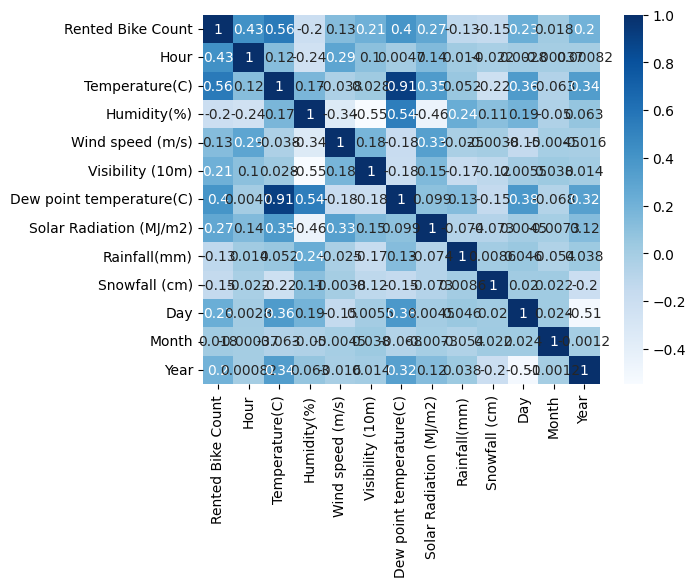

In [296]:
# Excluir columnas no numéricas
numeric_data = data.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr = numeric_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

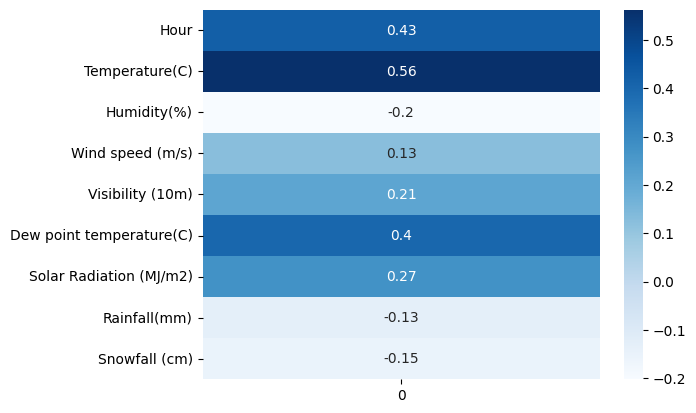

In [208]:
corrw = numeric_data.drop(['Rented Bike Count'], axis=1).corrwith(data['Rented Bike Count'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

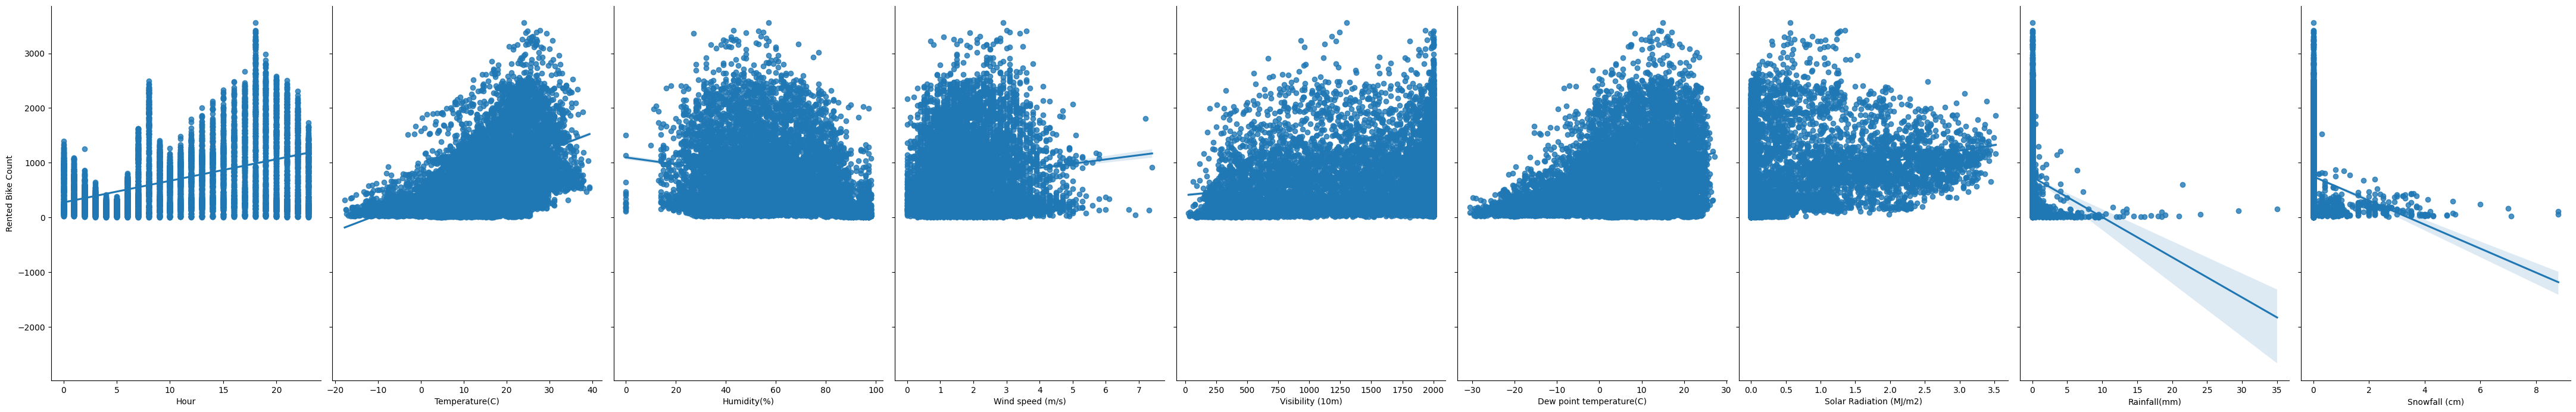

In [209]:


sns.pairplot(numeric_data, x_vars=[
'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)'], y_vars='Rented Bike Count', height=7, aspect=0.7, kind='reg')

**Normalidad**

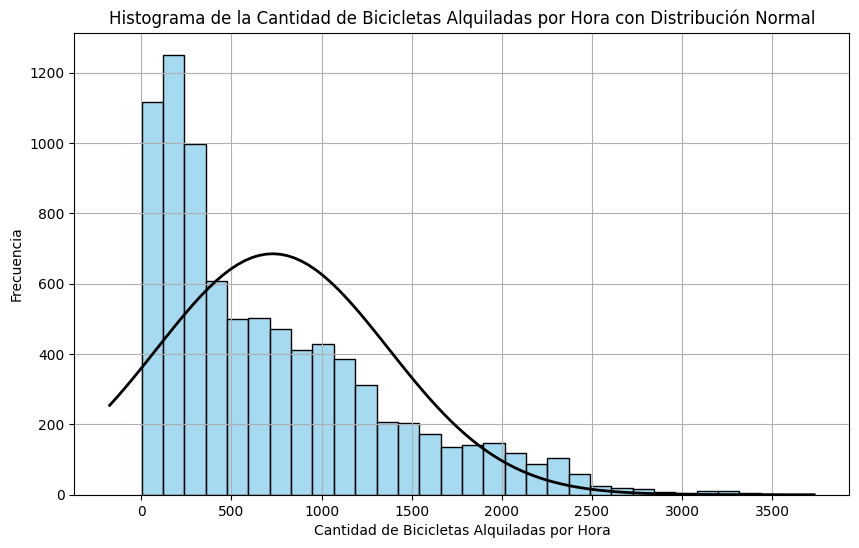

In [303]:
from scipy.stats import norm

# Crear el histograma de la cantidad de bicicletas alquiladas
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rented Bike Count', bins=30, kde=False, color='skyblue')

# Calcular la media y desviación estándar de la cantidad de bicicletas alquiladas
mean = data['Rented Bike Count'].mean()
std = data['Rented Bike Count'].std()

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Bicicletas Alquiladas por Hora')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Cantidad de Bicicletas Alquiladas por Hora con Distribución Normal')
plt.grid(True)
plt.show()

In [308]:
from scipy.stats import kstest, norm

# Seleccionar la variable dependiente

rented_bike_count = data['Rented Bike Count']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(rented_bike_count, 'norm', args=(rented_bike_count.mean(), rented_bike_count.std()))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

Estadístico de Kolmogorov-Smirnov: 0.12887712035253535
Valor p: 4.90060238564064e-123
La variable dependiente no sigue una distribución normal (rechazar H0)


**Box-Cox transformation**

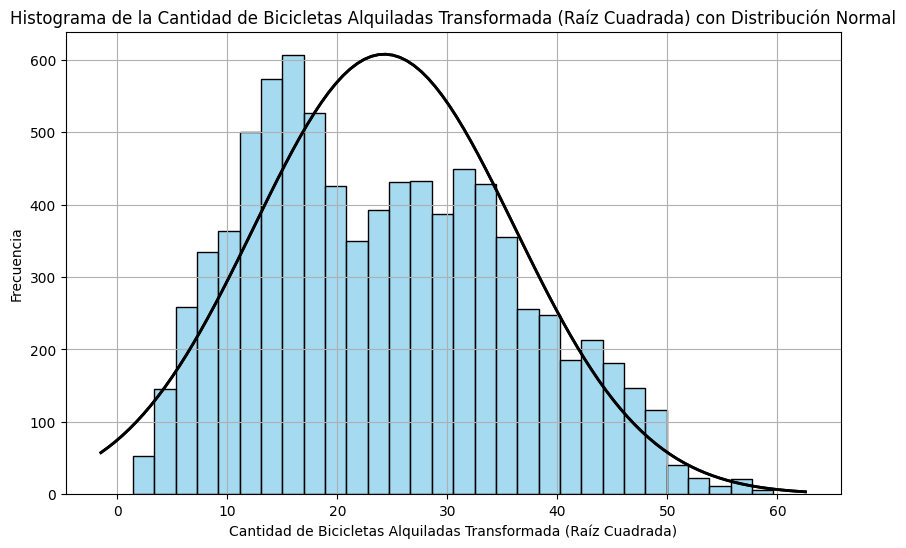

In [379]:
from scipy.stats import boxcox
import numpy as np
# Seleccionar la variable dependiente
rented_bike_count = data['Rented Bike Count']

# Aplicar la transformación de Box-Cox
rented_bike_count_transformed = np.sqrt(rented_bike_count)  # Añadir 1 para evitar problemas con valores cero

# Añadir la columna transformada al DataFrame
data['Rented Bike Count Transformed'] = rented_bike_count_transformed

# Crear el histograma de la cantidad de bicicletas alquiladas transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rented Bike Count Transformed', bins=30, kde=False, color='skyblue')

# Calcular la media y desviación estándar de la cantidad de bicicletas alquiladas transformada
mean_transformed = data['Rented Bike Count Transformed'].mean()
std_transformed = data['Rented Bike Count Transformed'].std()
# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Bicicletas Alquiladas Transformada (Raíz Cuadrada)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Cantidad de Bicicletas Alquiladas Transformada (Raíz Cuadrada) con Distribución Normal')
plt.grid(True)
plt.show()

### Modelo de regresión

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4 \times \text{Wind speed} + \beta_5 \times \text{Visibility} + \beta_6 \times \text{Dew point temperature} + \beta_7 \times \text{Solar Radiation} + \beta_8 \times \text{Rainfall} + \beta_9 \times \text{Snowfall} + \alpha_1 \times \text{Seasons} + \alpha_2 \times \text{Holiday}$

**Variables Explicativas**

In [385]:
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

X = data[features]
X = pd.get_dummies(X, columns=['Seasons','Holiday'], dtype=int, drop_first=True)

X.head()

Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0            -5.2           37               2.2              2000   
1     1            -5.5           38               0.8              2000   
2     2            -6.0           39               1.0              2000   
3     3            -6.2           40               0.9              2000   
4     4            -6.0           36               2.3              2000   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.0               0               0               1   
1            0.0               0               0               1   
2            0.0               0               0               1   
3            0.0               0               0               1   
4            0.0               0               0               1   

   Holiday_No Holiday  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [386]:
X.shape

(8465, 13)

**Variable de respuesta**

In [491]:
# variable de respuesta
import numpy as np

Y = data['Rented Bike Count Transformed']
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count Transformed, dtype: float64

**Tipo de datos por variables**

In [492]:
# tipos de X y y
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Modelo con todas las variables

In [493]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


In [494]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.620
Model:                                       OLS   Adj. R-squared:                  0.619
Method:                            Least Squares   F-statistic:                     848.1
Date:                           Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                                   00:41:37   Log-Likelihood:                -23064.
No. Observations:                           6772   AIC:                         4.616e+04
Df Residuals:                               6758   BIC:                         4.625e+04
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

**Verificacion de problemas en el modelo de regresion lineal**

**Verificacion de multicolinialidad con estos datos**

In [496]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                    Variable         VIF
1                       Hour    1.206624
2             Temperature(C)   90.014794
3                Humidity(%)   20.351053
4           Wind speed (m/s)    1.299927
5           Visibility (10m)    1.702329
6   Dew point temperature(C)  118.066770
7    Solar Radiation (MJ/m2)    2.023486
8               Rainfall(mm)    1.085400
9              Snowfall (cm)    1.120201
10            Seasons_Spring    1.713375
11            Seasons_Summer    2.623593
12            Seasons_Winter    3.387268
13        Holiday_No Holiday    1.023907


El modelo presenta un problema de multicolinealidad, por lo que se debe realizar un análisis de componentes principales para reducir la dimensionalidad de los datos.

La multicolinealidad imperfecta ocurre cuando las columnas de la matriz XTX son casi linealmente
dependientes, lo que resulta en un determinante cercano a cero. Esto implica que es posible calcular la
inversa de la matriz, pero los valores resultantes serán muy grandes en valor absoluto. Para abordar este
problema, se propone eliminar las variables que presenten la mayor correlación entre sí. Posteriormente,
se puede recalcular el factor de inflación de la varianza (VIF) en el nuevo modelo sin estas variables para
determinar si se ha resuelto el problema de multicolinealidad imperfecta. En este modelo en especifico al
determinar la matriz de correlación entre las variables se obtuvo el siguiente resultado:

<Axes: >

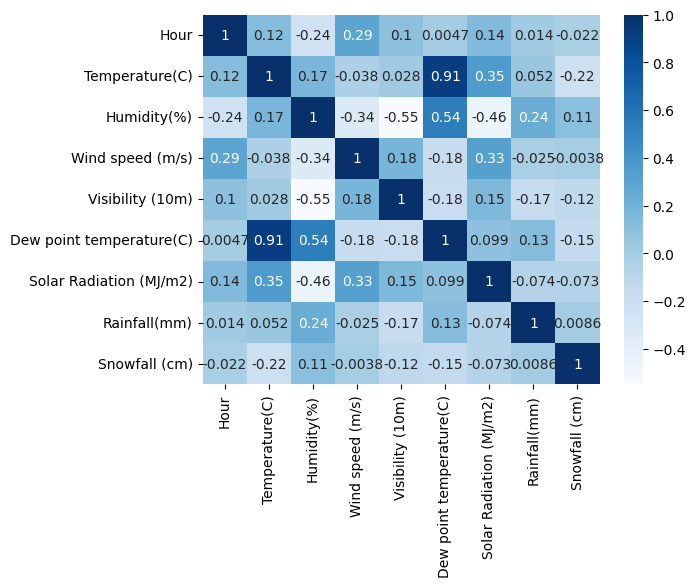

In [497]:
numeric_data_without_target = numeric_data.drop(columns=['Rented Bike Count', 'Day', 'Month', 'Year'])

# Calcular la matriz de correlación
corr = numeric_data_without_target.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

A partir de los resultados obtenidos, se observa que la variable "Dew Point Temperature (C)" presenta la correlación más alta con respecto a las demás variables. Por lo tanto, como solución se propone eliminar esta variable del modelo.

In [498]:
X_reduced = X.drop(columns=['Dew point temperature(C)'])

# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X_reduced)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                   Variable       VIF
1                      Hour  1.205105
2            Temperature(C)  5.105913
3               Humidity(%)  2.627774
4          Wind speed (m/s)  1.298201
5          Visibility (10m)  1.696572
6   Solar Radiation (MJ/m2)  1.932015
7              Rainfall(mm)  1.071460
8             Snowfall (cm)  1.113848
9            Seasons_Spring  1.711631
10           Seasons_Summer  2.603473
11           Seasons_Winter  3.386279
12       Holiday_No Holiday  1.023819


Tras realizar el cambio y volver a calcular los valores del VIF (factor de inflación de la varianza), se ha observado que estos
son inferiores a 10. Este resultado indica que se ha solucionado el problema de multicolinealidad en el modelo.

In [499]:
### Modelo con las variables significativas
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']


X_Reduce = data[features]
X_Reduce = pd.get_dummies(X_Reduce, columns=['Seasons','Holiday'], dtype=int, drop_first=True)

X_Reduce.head()

Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0            -5.2           37               2.2              2000   
1     1            -5.5           38               0.8              2000   
2     2            -6.0           39               1.0              2000   
3     3            -6.2           40               0.9              2000   
4     4            -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Spring  \
0                      0.0           0.0            0.0               0   
1                      0.0           0.0            0.0               0   
2                      0.0           0.0            0.0               0   
3                      0.0           0.0            0.0               0   
4                      0.0           0.0            0.0               0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
0               0               1                   1  
1               0               1                   1  
2               0               1                   1  
3               0               1                   1  
4               0               1                   1

In [500]:
X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduce, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelSM = sm.OLS(y_train, X_trainSM).fit()

# resumen de resultados
print(modelSM.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.617
Model:                                       OLS   Adj. R-squared:                  0.616
Method:                            Least Squares   F-statistic:                     906.9
Date:                           Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                                   00:42:00   Log-Likelihood:                -23092.
No. Observations:                           6772   AIC:                         4.621e+04
Df Residuals:                               6759   BIC:                         4.630e+04
Df Model:                                     12                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

**Verificacion de Heterocedasticidad con estos datos**

In [501]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelSM.resid, modelSM.model.exog)

# Extraer los resultados del test
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]
bp_test_fvalue = bp_test[2]
bp_test_f_pvalue = bp_test[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}")
print(f"Breusch-Pagan Test p-value: {bp_test_pvalue}")
print(f"Breusch-Pagan Test F-Statistic: {bp_test_fvalue}")
print(f"Breusch-Pagan Test F p-value: {bp_test_f_pvalue}")

Breusch-Pagan Test Statistic: 642.1647735113634
Breusch-Pagan Test p-value: 1.0384532588039834e-129
Breusch-Pagan Test F-Statistic: 59.00636727024521
Breusch-Pagan Test F p-value: 1.7104240513330265e-136


In [504]:
import numpy as np
# Aplicar la transformación logarítmica a la variable dependiente
y_log = np.log(Y + 1)  # Se suma 1 para evitar log(0)

X_trainHomo, X_test, y_trainHomo, y_test = train_test_split(X_Reduce, y_log, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainHomo = sm.add_constant(X_trainHomo)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelHomo = sm.OLS(y_trainHomo, X_trainHomo).fit()


# Realizar el test de Breusch-Pagan
bp_test_log = het_breuschpagan(modelHomo.resid, modelHomo.model.exog)

# Extraer los resultados del test
bp_test_stat_log = bp_test_log[0]
bp_test_pvalue_log = bp_test_log[1]
bp_test_fvalue_log = bp_test_log[2]
bp_test_f_pvalue_log = bp_test_log[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic (log): {bp_test_stat_log}")
print(f"Breusch-Pagan Test p-value (log): {bp_test_pvalue_log}")
print(f"Breusch-Pagan Test F-Statistic (log): {bp_test_fvalue_log}")
print(f"Breusch-Pagan Test F p-value (log): {bp_test_f_pvalue_log}")


Breusch-Pagan Test Statistic (log): 1396.8409201385011
Breusch-Pagan Test p-value (log): 6.673712036870377e-292
Breusch-Pagan Test F-Statistic (log): 146.37160251046623
Breusch-Pagan Test F p-value (log): 0.0


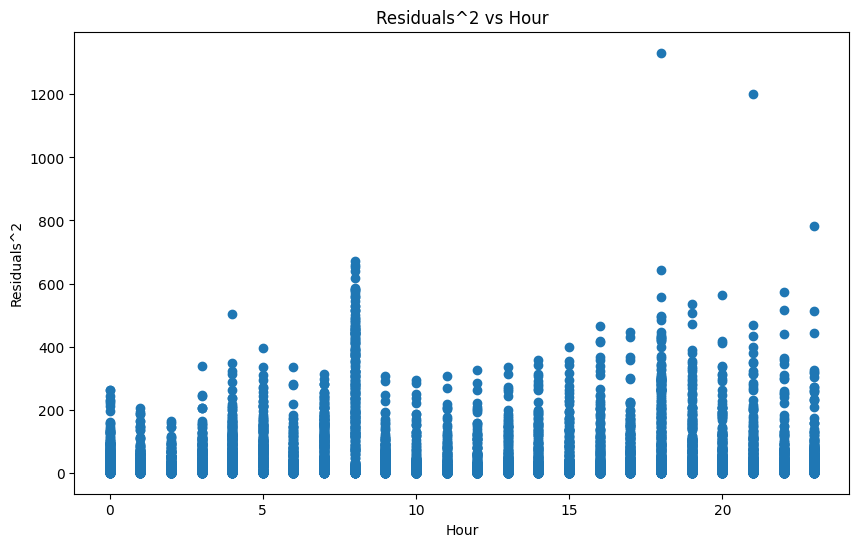

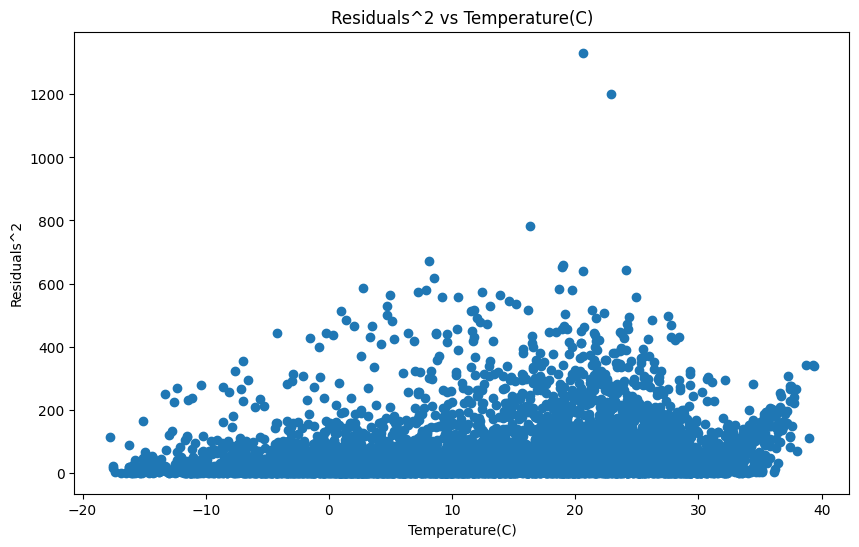

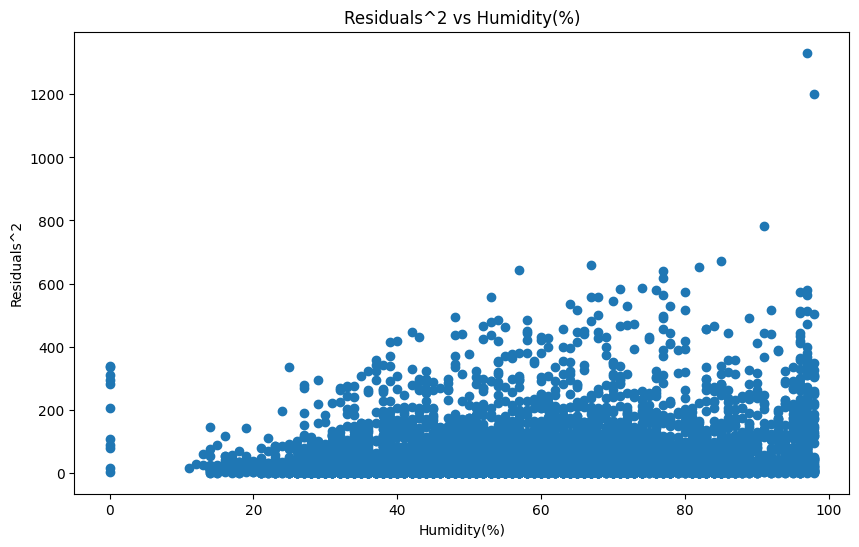

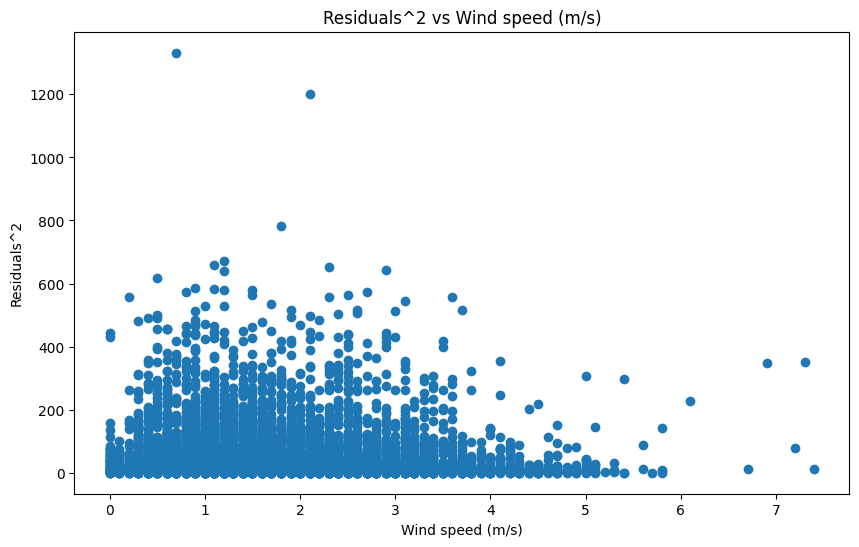

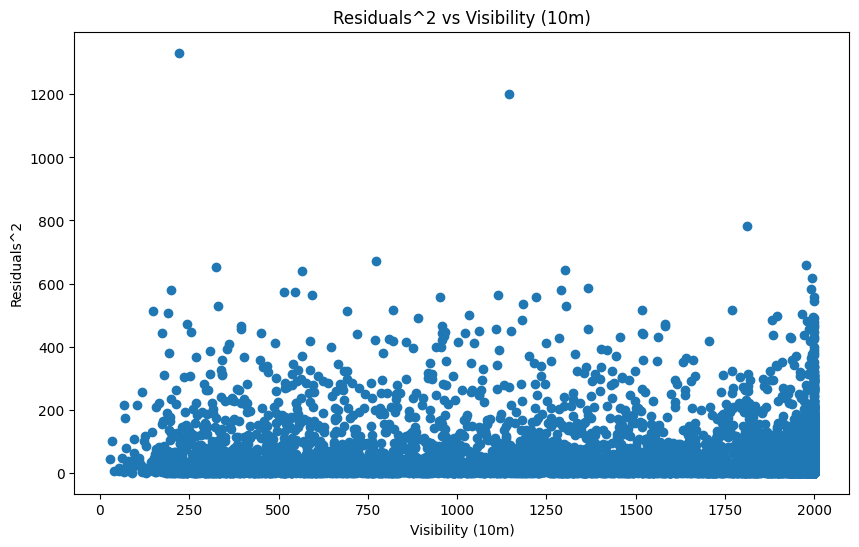

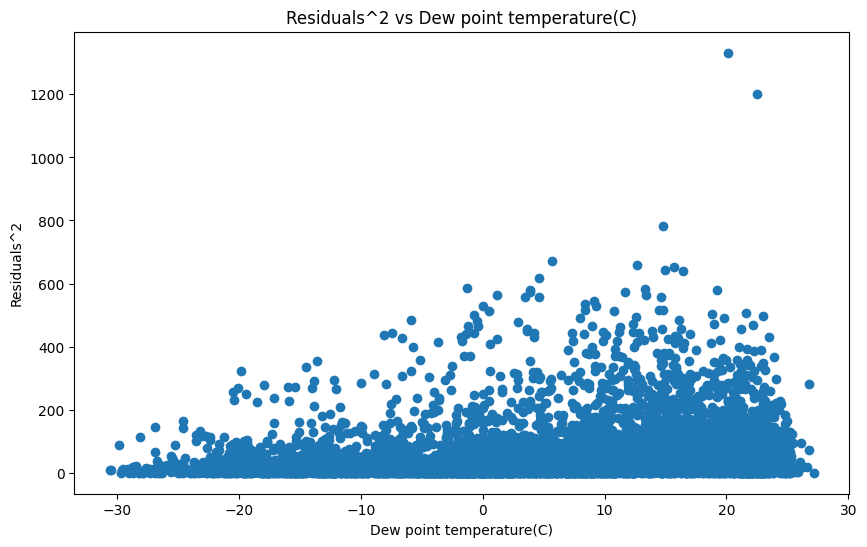

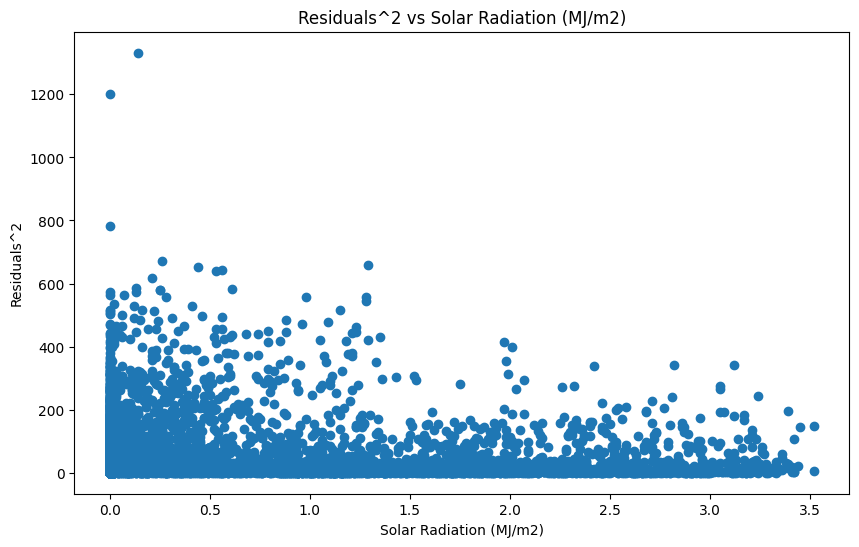

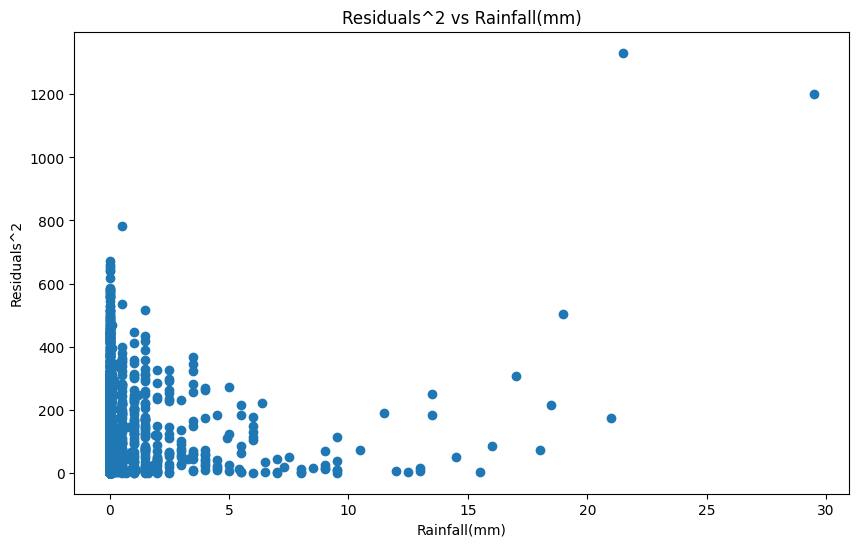

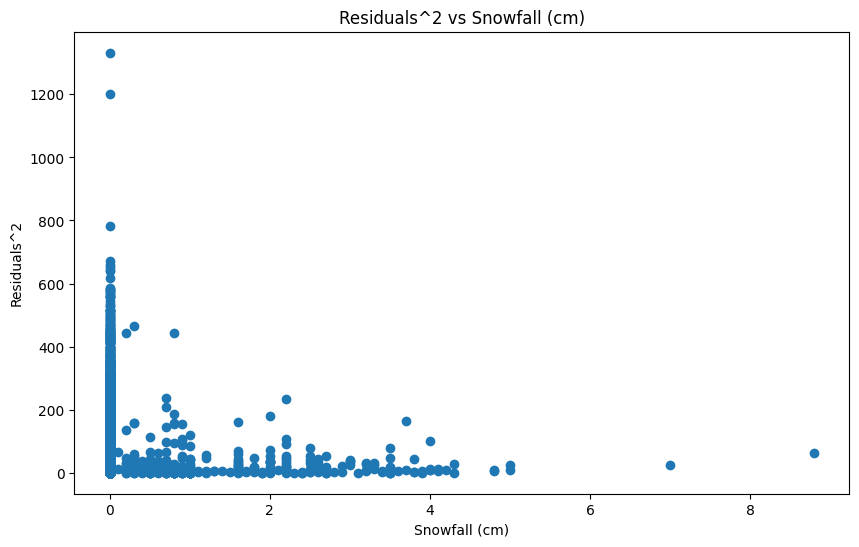

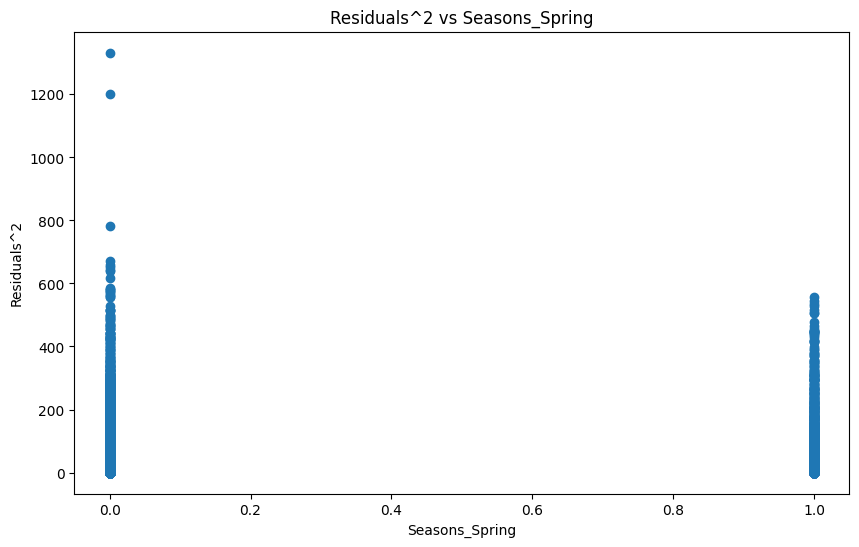

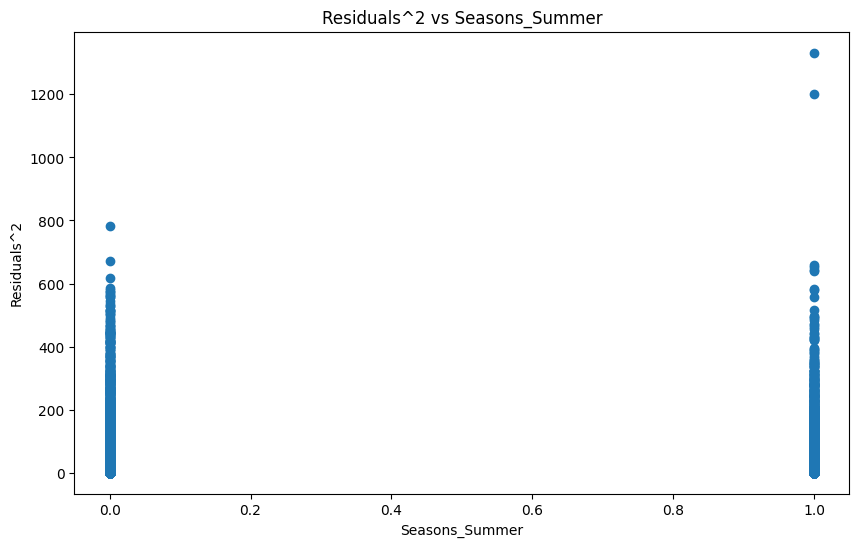

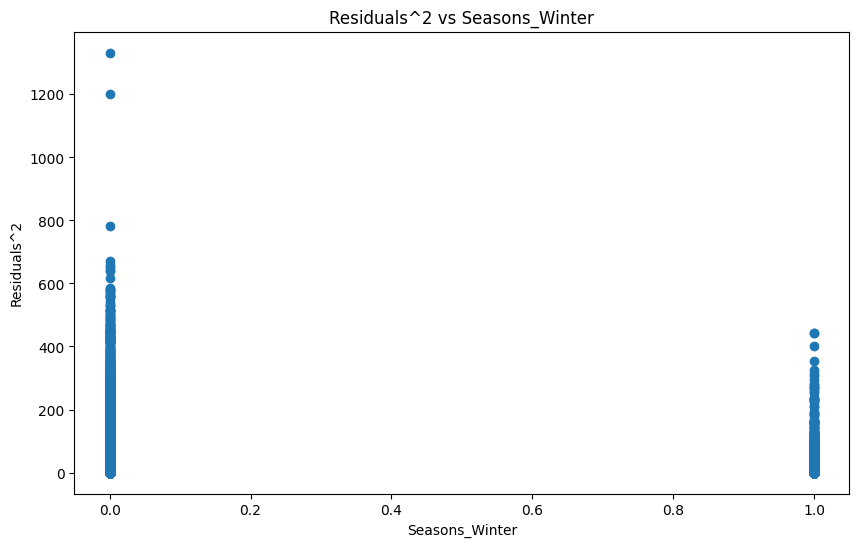

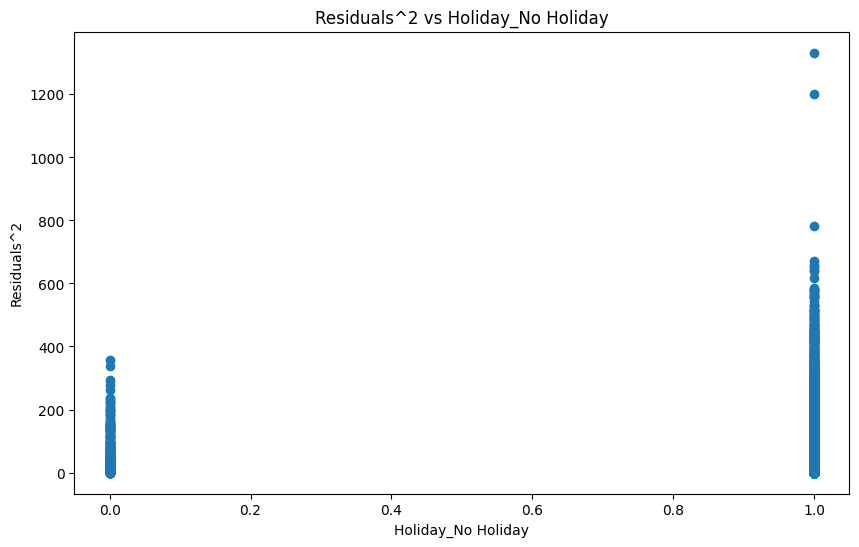

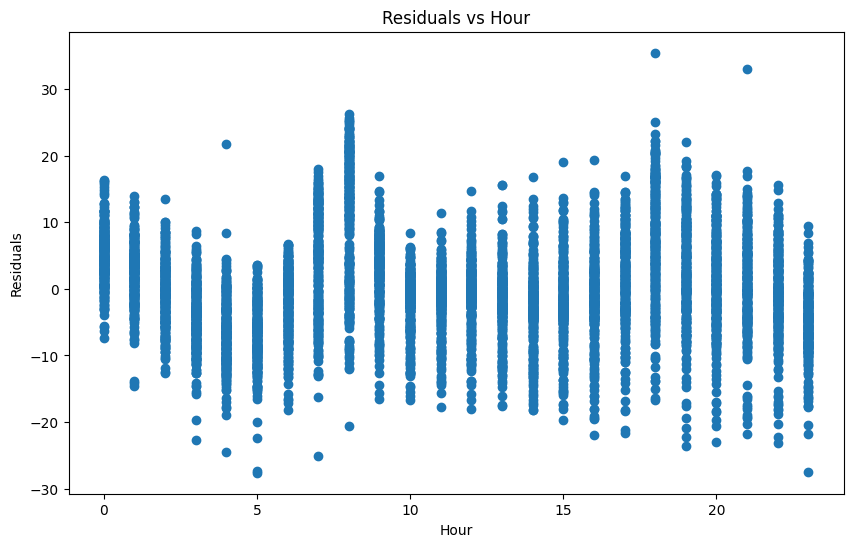

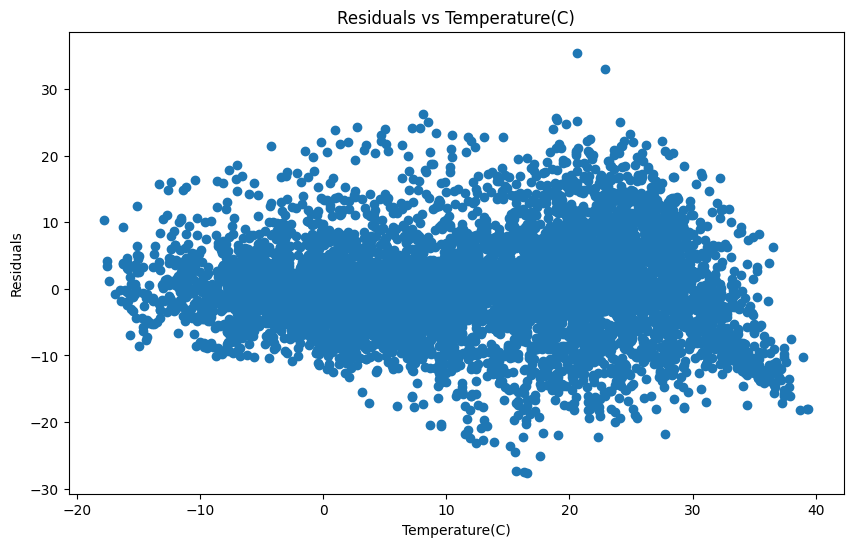

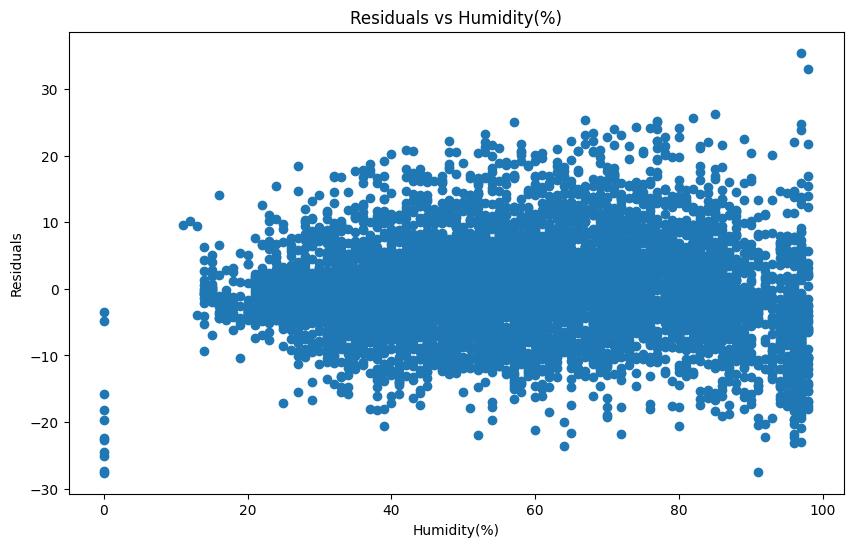

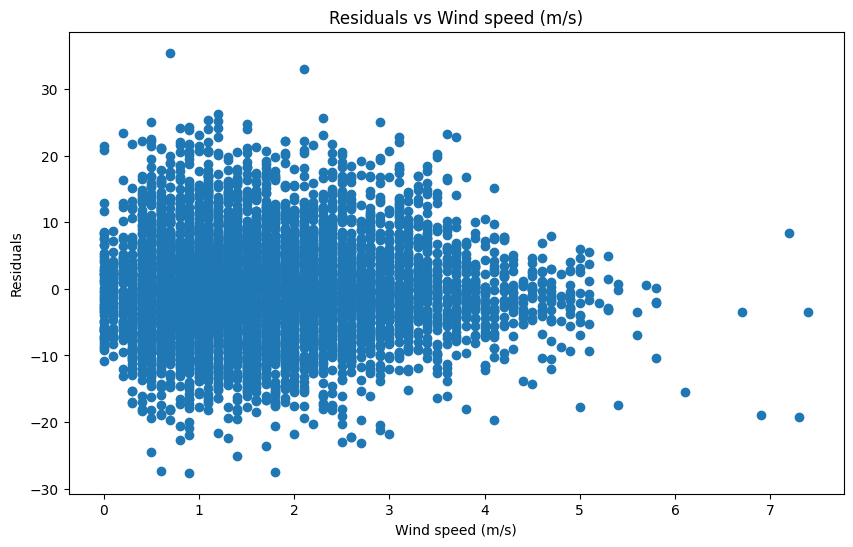

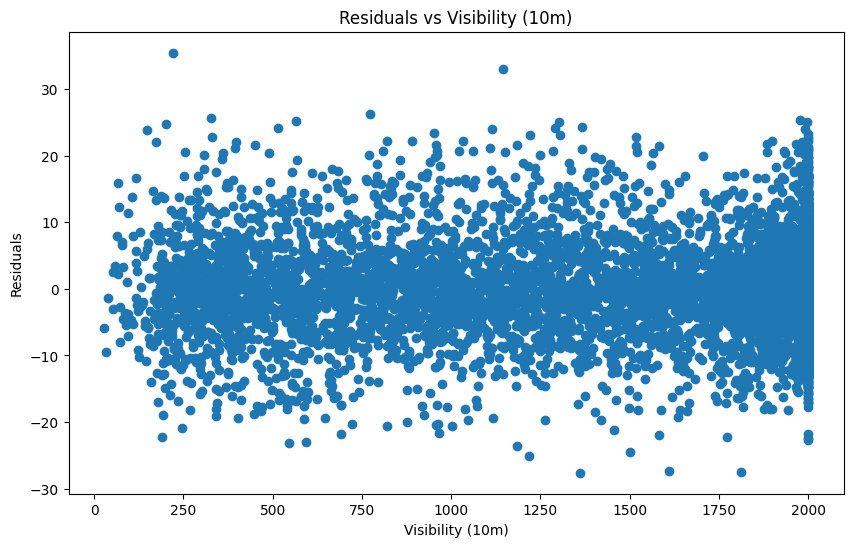

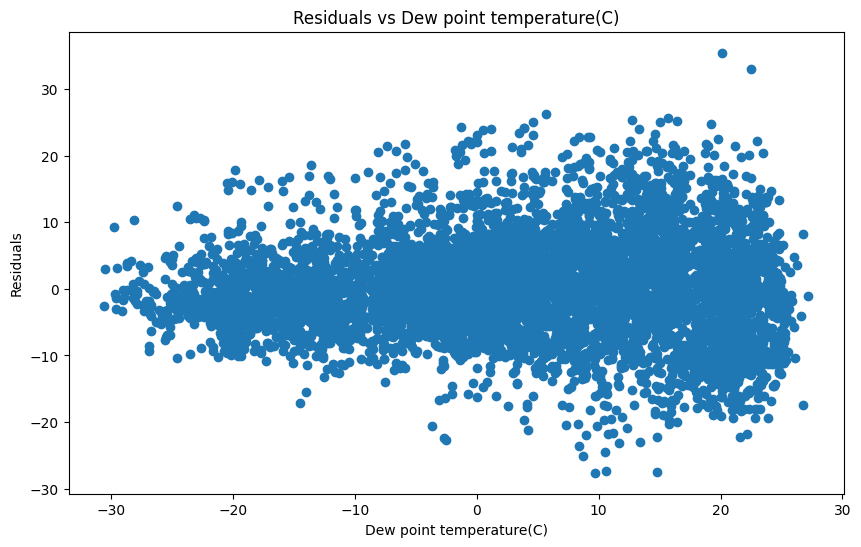

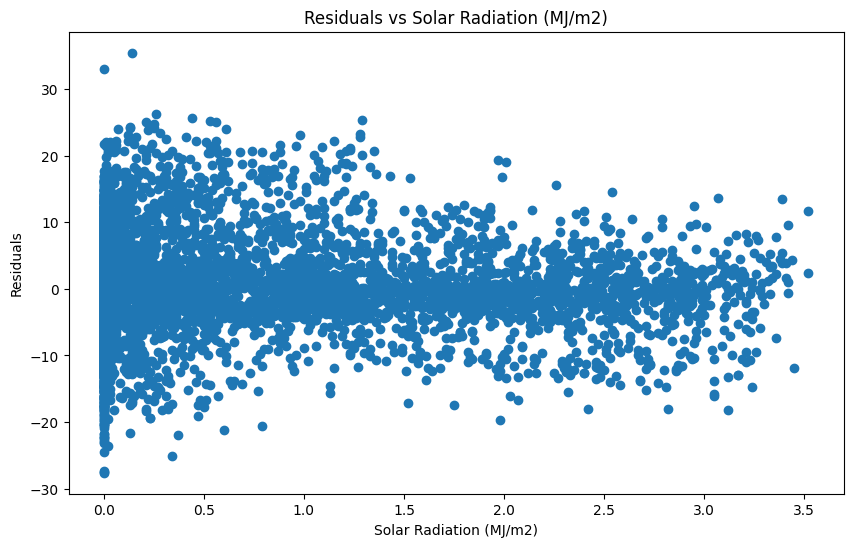

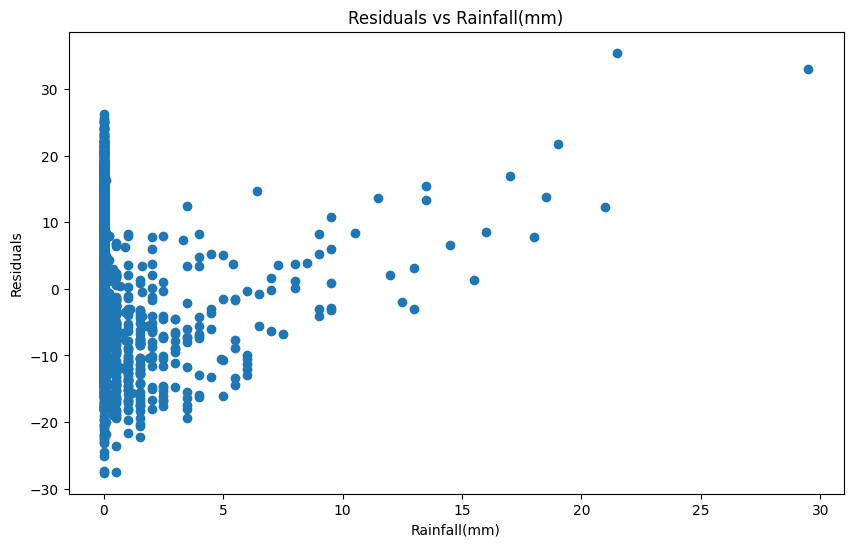

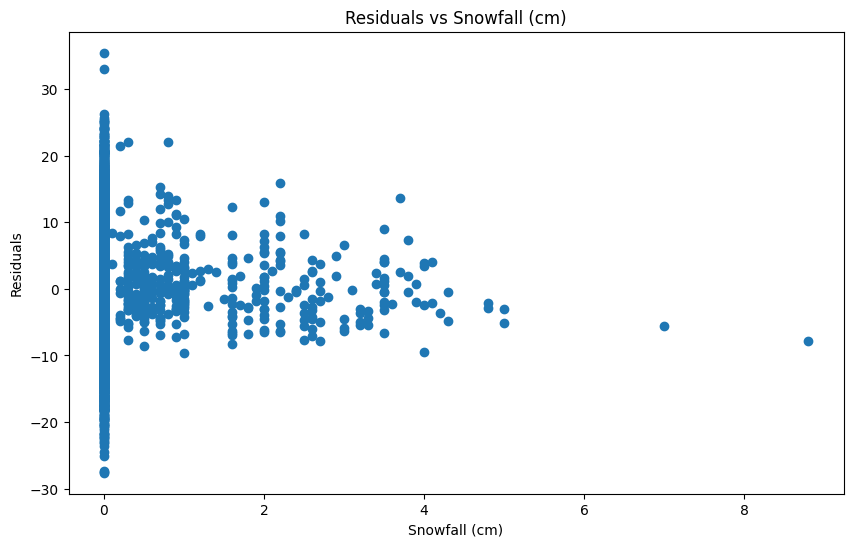

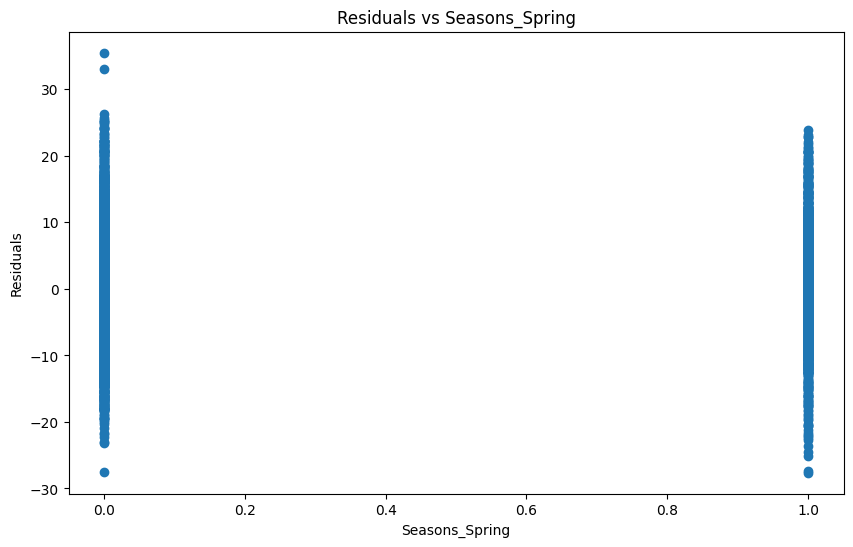

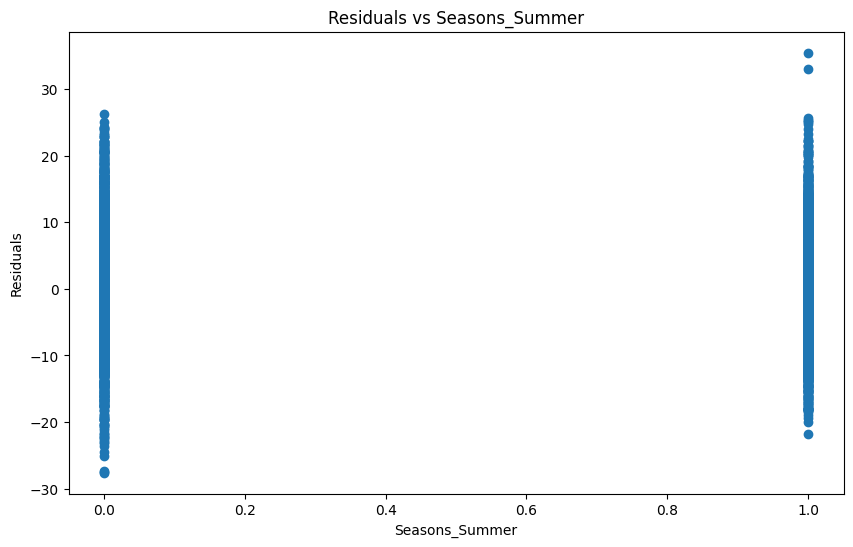

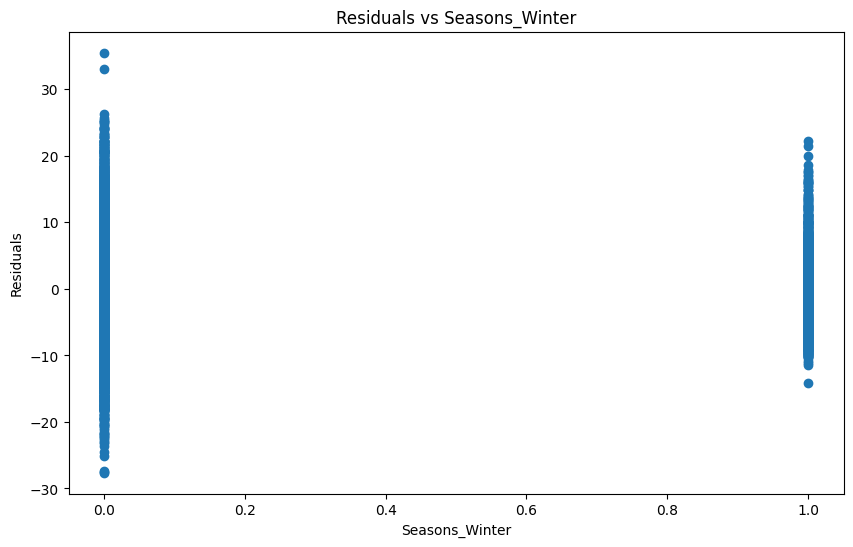

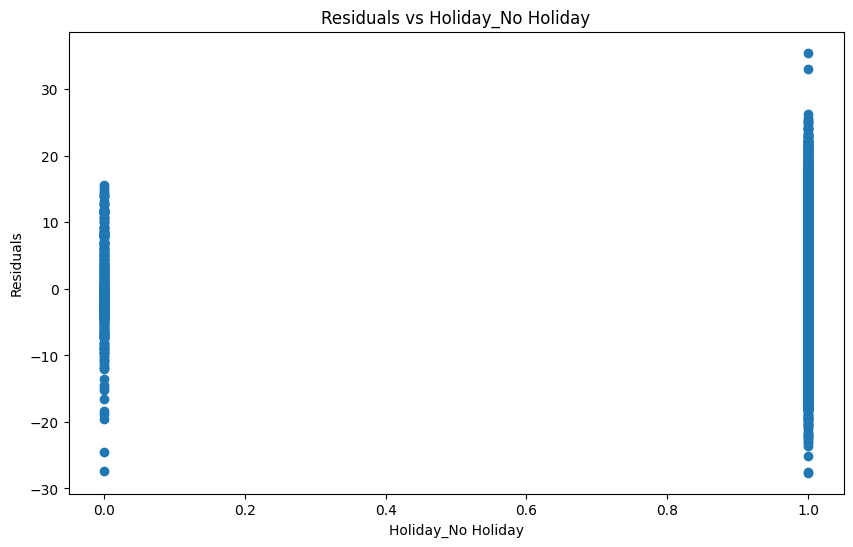

In [508]:
import matplotlib.pyplot as plt

# Graficar los residuales al cuadrado respecto a cada variable independiente
for column in X_train.columns:
    if column != 'const':  # Omitir la constante
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[column], modelSM.resid**2)
        plt.xlabel(column)
        plt.ylabel('Residuals^2')
        plt.title(f'Residuals^2 vs {column}')
        plt.show()

# Graficar los residuales respecto a cada variable independiente
for column in X_train.columns:
    if column != 'const':  # Omitir la constante
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[column], model.resid)
        plt.xlabel(column)
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs {column}')
        plt.show()

**Verificacion de Especificación con estos datos**

In [516]:
### Modelo con las variables significativas
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

X_Reduce = data[features]
X_Reduce = pd.get_dummies(X_Reduce, columns=['Seasons','Holiday'], dtype=int, drop_first=True)

X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduce, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelSM = sm.OLS(y_train, X_trainSM).fit()

# resumen de resultados
print(modelSM.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.617
Model:                                       OLS   Adj. R-squared:                  0.616
Method:                            Least Squares   F-statistic:                     906.9
Date:                           Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                                   00:51:15   Log-Likelihood:                -23092.
No. Observations:                           6772   AIC:                         4.621e+04
Df Residuals:                               6759   BIC:                         4.630e+04
Df Model:                                     12                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [515]:
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(modelSM, power=2, use_f=True)

# Imprimir los resultados del test
print(reset_test)

<F test: F=437.65775331198193, p=3.224305575923201e-94, df_denom=6.76e+03, df_num=1>


Ya que el p-value es menor a 0,05 se rechaza la hipótesis nula, por lo cual el modelo presenta
problemas de heterocedasticidad.

### Modelo sin Multicolinealidad y con las variables significativas

In [536]:
### Modelo con las variables significativas
# nombres de características
#sin wind speed, snowfall, visibility
features = ['Hour', 'Temperature(C)', 'Humidity(%)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Seasons','Holiday']


X_Reduced = data[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['Seasons','Holiday'], dtype=int, drop_first=True)

X_Reduced.head()

Hour  Temperature(C)  Humidity(%)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0     0            -5.2           37                      0.0           0.0   
1     1            -5.5           38                      0.0           0.0   
2     2            -6.0           39                      0.0           0.0   
3     3            -6.2           40                      0.0           0.0   
4     4            -6.0           36                      0.0           0.0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
0               0               0               1                   1  
1               0               0               1                   1  
2               0               0               1                   1  
3               0               0               1                   1  
4               0               0               1                   1

In [529]:
Y = data["Rented Bike Count Transformed"]
Y.head()

Y.shape

(8465,)

In [537]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

**Regresion y resultados**

In [538]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
reducedModel = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(reducedModel.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.617
Model:                                       OLS   Adj. R-squared:                  0.616
Method:                            Least Squares   F-statistic:                     1209.
Date:                           Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                                   00:53:37   Log-Likelihood:                -23093.
No. Observations:                           6772   AIC:                         4.621e+04
Df Residuals:                               6762   BIC:                         4.627e+04
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

## Resumen variables de interes


### Coficientes de cada modelo

In [539]:
coeficients = reducedModel.params
print(coeficients)

const                      23.561057
Hour                        0.507287
Temperature(C)              0.486583
Humidity(%)                -0.166437
Solar Radiation (MJ/m2)    -0.860985
Rainfall(mm)               -1.779557
Seasons_Spring             -3.135991
Seasons_Summer             -3.119328
Seasons_Winter             -8.059535
Holiday_No Holiday          2.895137
dtype: float64


### R cuadrado de cada modelo

In [540]:
print(reducedModel.rsquared, reducedModel.rsquared_adj)

0.6167637275789422 0.6162536526821971


## Ahora usando SKLearn

### División entre entrenamiento y prueba

In [541]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

In [542]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6772, 9)
(6772,)
(1693, 9)
(1693,)


In [543]:
print(X_Reduced.head())
print(X_train.head())

   Hour  Temperature(C)  Humidity(%)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0     0            -5.2           37                      0.0           0.0   
1     1            -5.5           38                      0.0           0.0   
2     2            -6.0           39                      0.0           0.0   
3     3            -6.2           40                      0.0           0.0   
4     4            -6.0           36                      0.0           0.0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
0               0               0               1                   1  
1               0               0               1                   1  
2               0               0               1                   1  
3               0               0               1                   1  
4               0               0               1                   1  
      Hour  Temperature(C)  Humidity(%)  Solar Radiation (MJ/m2)  \
5707    19            29.

In [544]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_Reduced, Y, random_state=1, test_size=0.2)

In [545]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6772, 9)
(6772,)
(1693, 9)
(1693,)


In [546]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [547]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

23.56105728029004
[ 0.50728686  0.48658284 -0.16643741 -0.8609848  -1.77955677 -3.13599098
 -3.11932838 -8.05953458  2.89513725]


In [548]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Hour', np.float64(0.5072868567571881)),
 ('Temperature(C)', np.float64(0.486582837923629)),
 ('Humidity(%)', np.float64(-0.16643741481746588)),
 ('Solar Radiation (MJ/m2)', np.float64(-0.8609848008211437)),
 ('Rainfall(mm)', np.float64(-1.7795567725884425)),
 ('Seasons', np.float64(-3.1359909831233415)),
 ('Holiday', np.float64(-3.119328378891002))]

### Predicciones usando los datos de prueba

In [549]:
y_pred = linreg.predict(X_test)

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [550]:
from sklearn import metrics

In [551]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [552]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.733850647112201
MSE:  55.70116579115832
RMSE:  7.463321364590856


### Validación cruzada

In [553]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X_Reduced, Y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 32.79112933  49.21139091 103.22887947 105.75714463  55.38341692]


In [554]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 5.72635393  7.0150831  10.16016139 10.28382928  7.44200356]


In [555]:
# MSE y RMSE promedio a través de todos los grupos
print("MSE Promedio", mse_scores.mean())
print("RMSE Promedio", rmse_scores.mean())

MSE Promedio 69.27439225170072
RMSE Promedio 8.12548625085778
